# Brute Force Model 
We noticed that given the available training data, the available test data and the requested goal, we can easily achieve a high precision-recall by only shifting the variable 'aircon_sum_wo_prev14d' which contains all the informations needed to predict the target label. <br> Given the data as it is, we can easily predict faults by just shifting the information on the previous faults. 

In [32]:
import pandas as pd
import seaborn as sns
import os
import sys
import numpy as np

import matplotlib.pyplot as plt
import datetime as dt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.model_selection import cross_validate


from sklearn.model_selection import StratifiedKFold

from scipy import stats

import random


sys.path.append('..')


In [2]:
from helper import data_container

In [3]:
dataset_path = '../dataset/train.csv'

In [9]:
dataset = pd.read_csv(dataset_path)

container = data_container(dataset, drop=False)
df_14 = container.compute_14d_features()

with pd.option_context('display.max_columns', None):
    display (df_14)

,SITE_ID,DATE,N_TRANSPORTED_SITES,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,GEOGRAPHIC_CLUSTER_K_3,GEOGRAPHIC_CLUSTER_K_4,GEOGRAPHIC_CLUSTER_K_5,GEOGRAPHIC_CLUSTER_K_6,GEOGRAPHIC_CLUSTER_K_7,GEOGRAPHIC_CLUSTER_K_8,GEOGRAPHIC_CLUSTER_K_9,aircon_sum_wo_prev14d,aircon_sum_target_next14d,mean_temperature_f_next14d,max_temperature_f_next14d,min_temperature_f_next14d,mean_rain_mm_f_next14d,max_rain_mm_f_next14d,min_rain_mm_f_next14d,mean_humidity_f_next14d,max_humidity_f_next14d,min_humidity_f_next14d,mean_wind_speed_f_next14d,max_wind_speed_f_next14d,min_wind_speed_f_next14d,mean_pressure_f_next14d,max_pressure_f_next14d,min_pressure_f_next14d,equipment_sum_alarms_prev14d,fire/smoke_sum_alarms_prev14d,ge_sum_alarms_prev14d,power_sum_alarms_prev14d,temperature_sum_alarms_prev14d,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d,max_temperature_prev14d,min_temperature_prev14d,mean_temperature_prev14d,max_rain_mm_prev14d,min_rain_mm_prev14d,mean_rain_mm_prev14d,max_humidity_prev14d,min_humidity_prev14d,mean_humidity_prev14d,max_wind_speed_prev14d,min_wind_speed_prev14d,mean_wind_speed_prev14d,max_pressure_prev14d,min_pressure_prev14d,mean_pressure_prev14d,equipment_max_persistance_prev14d,equipment_min_persistance_prev14d,equipment_mean_persistance_prev14d,fire/smoke_max_persistance_prev14d,fire/smoke_min_persistance_prev14d,fire/smoke_mean_persistance_prev14d,ge_max_persistance_prev14d,ge_min_persistance_prev14d,ge_mean_persistance_prev14d,power_max_persistance_prev14d,power_min_persistance_prev14d,power_mean_persistance_prev14d,temperature_max_persistance_prev14d,temperature_min_persistance_prev14d,temperature_mean_persistance_prev14d,month,day_sin,day_cos
0,146,2019-04-10,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0,8.00,12.0,5.0,4.79,19.6,0.1,74.29,89.0,58.0,12.86,17.0,5.0,1020.71,1028.0,1009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,14.0,6.0,10.290,8.5,0.0,1.330,81.0,45.0,62.710,16.0,5.0,11.430,1022.0,1006.0,1013.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,8.978045e-01,-0.440394
1,146,2019-04-11,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0,8.50,16.0,5.0,3.52,12.5,0.1,72.93,89.0,58.0,12.57,17.0,5.0,1021.71,1028.0,1013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,16.0,9.0,11.710,8.5,0.0,1.900,81.0,51.0,66.430,16.0,5.0,11.570,1017.0,1006.0,1010.860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,7.907757e-01,-0.612106
2,146,2019-04-12,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0,9.36,20.0,5.0,3.63,12.5,0.1,72.00,89.0,58.0,12.29,17.0,5.0,1022.14,1028.0,1016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,16.0,9.0,11.570,19.6,0.0,4.700,88.0,58.0,71.710,16.0,5.0,11.710,1015.0,1006.0,1009.710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,6.513725e-01,-0.758758
3,146,2019-04-13,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0,10.57,22.0,5.0,3.40,12.5,0.1,70.07,89.0,58.0,12.14,17.0,5.0,1021.86,1028.0,1012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,16.0,8.0,11.290,19.6,0.0,4.770,88.0,58.0,74.290,16.0,5.0,11.430,1013.0,1006.0,1009.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4.853020e-01,-0.874347
4,146,2019-04-14,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0,11.50,22.0,5.0,3.49,12.5,0.1,69.07,89.0,58.0,11.64,17.0,5.0,1021.29,1028.0,1009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,16.0,5.0,10.570,19.6,0.3,5.390,88.0,58.0,77.290,15.0,5.0,10.860,1016.0,1006.0,1009.860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2.993631e-01,-0.954139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [10]:
# selecting a set of SITE_IDs to make a test set similar to the given one in the project

arr_site_id = df_14['SITE_ID'].unique()
random.shuffle(arr_site_id)

site_train = arr_site_id[:1656]
site_test = arr_site_id[-(len(arr_site_id)-1656):]

In [26]:
df_train = df_14.loc[df_14['SITE_ID'].isin(site_train)]
df_test = df_14.loc[df_14['SITE_ID'].isin(site_test)]

df_train = df_train.drop(columns='SITE_ID')
df_test = df_test.drop(columns='SITE_ID')

X_train=df_train.drop(columns=['aircon_sum_target_next14d'])
y_train=df_train['aircon_sum_target_next14d']
X_test=df_test.drop(columns=['aircon_sum_target_next14d'])
y_test=df_test['aircon_sum_target_next14d']

In [27]:
X_test['prediction'] = X_test['aircon_sum_wo_prev14d'].shift(-15, axis = 0)
X_test['prediction'] =  (X_test['prediction'] > 0).astype(int)

In [30]:
y_pred=X_test['prediction']

Accuracy:  0.9997349397590362
Precision:  0.9716216216216216
Recall:  0.9835841313269493


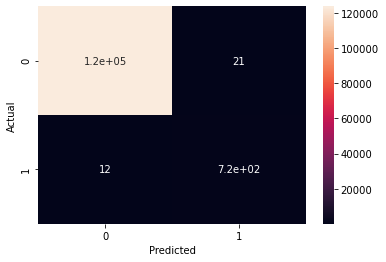

In [33]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Precision: ',metrics.precision_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred))